# Part 1

In [12]:
from collections import defaultdict

In [13]:
input_file = 'day11_input.txt'

### The IntCode Computer from Day 9

In [38]:
class intCodeComputer:
    def __init__(self, filename):
        self.program = defaultdict(lambda:'0')
        with open(filename, 'r') as f:
            line = f.readline()
        for i, code in enumerate(line.split(',')):
            self.program[i] = code

        self.memory_location = 0  
        self.relative_base = 0
        self.intcode_dict = {'01':4, '02':4, '03':2, '04':2, '05':3, '06':3, '07':4, '08':4, 
                             '09':2, '99':0}
        
    def process_parameter(self, parameter_mode, offset):
        if(parameter_mode == '0'):
            return self.program[int(self.program[self.memory_location + offset])]
        elif(parameter_mode == '1'):
            return self.program[self.memory_location + offset]
        elif(parameter_mode == '2'):
            relative_mode_parameter = int(self.program[self.memory_location + offset])
            return self.program[self.relative_base + relative_mode_parameter] 
            
    def execute_program(self, user_input = None):
        self.user_input = user_input
        while(True):
            p_opcode = self.program[self.memory_location]
            p_opcode = p_opcode.zfill(5)
            a, b, c, de = p_opcode[0], p_opcode[1], p_opcode[2], p_opcode[3:]
            #print(a, b, c, de)

            if(de == '01'):
                parameter1 = self.process_parameter(c, 1)
                parameter2 = self.process_parameter(b, 2) 
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base
                    
                self.program[parameter3] = str(int(parameter1) + int(parameter2))
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '02'):
                parameter1 = self.process_parameter(c, 1) 
                parameter2 = self.process_parameter(b, 2)
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base
                    
                self.program[parameter3] = str(int(parameter1) * int(parameter2))
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '03'):
                if(c == '0'):
                    parameter1 = int(self.program[self.memory_location + 1])
                elif(c == '1'):
                    print("I shouldn't be here")
                    parameter1 = int(self.memory_location + 1)                    
                elif(c == '2'):
                    parameter1 = self.relative_base + int(self.program[self.memory_location + 1])
                    
                self.program[parameter1] = self.user_input                    
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '04'):
                parameter1 = self.process_parameter(c, 1)
                print(parameter1)
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '05'):
                parameter1 = self.process_parameter(c, 1)
                parameter2 = self.process_parameter(b, 2)
                # print("Got here. Parameter 1, 2: {}, {}".format(parameter1, parameter2))

                if(int(parameter1) != 0):
                    self.memory_location = int(parameter2)
                else:        
                    self.memory_location += self.intcode_dict[de]

                continue

            if(de == '06'):
                parameter1 = self.process_parameter(c, 1)
                parameter2 = self.process_parameter(b, 2)

                if(int(parameter1) == 0):
                    self.memory_location = int(parameter2)
                else:        
                    self.memory_location += self.intcode_dict[de]

                continue

            if(de == '07'):
                parameter1 = int(self.process_parameter(c, 1))
                parameter2 = int(self.process_parameter(b, 2))
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base

                if(parameter1 < parameter2):
                    self.program[parameter3] = '1'
                else:        
                    self.program[parameter3] = '0'

                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '08'):
                parameter1 = int(self.process_parameter(c, 1))
                parameter2 = int(self.process_parameter(b, 2))
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base
                    
                if(parameter1 == parameter2):
                    self.program[parameter3] = '1'
                else:        
                    self.program[parameter3] = '0'

                self.memory_location += self.intcode_dict[de]
                continue
            
            if(de == '09'):
                parameter1 = self.process_parameter(c, 1)
                self.relative_base += int(parameter1)
                self.memory_location += self.intcode_dict[de]
                continue                

            if(de == '99'):
                break

In [98]:
class painterRobot(intCodeComputer):
    def __init__(self, input_file):
        self.x, self.y = 0, 0
        
        # dictionary to look up how coordinates change
        self.orientation = {0:(0, 1), 1:(1, 0), 2: (0, -1), 3:(-1, 0)}

        # robot orientation is initially "up"
        self.pointing = 0 

        self.program = defaultdict(lambda:'0')
        with open(input_file, 'r') as f:
            line = f.readline()
        for i, code in enumerate(line.split(',')):
            self.program[i] = code

        self.memory_location = 0  
        self.relative_base = 0
        self.intcode_dict = {'01':4, '02':4, '03':2, '04':2, '05':3, '06':3, '07':4, '08':4, 
                             '09':2, '99':0}
        
        self.map = defaultdict(int)
        self.mapSet = set()
        self.output_count = 0
        
        
    def process_parameter(self, parameter_mode, offset):
        if(parameter_mode == '0'):
            return self.program[int(self.program[self.memory_location + offset])]
        elif(parameter_mode == '1'):
            return self.program[self.memory_location + offset]
        elif(parameter_mode == '2'):
            relative_mode_parameter = int(self.program[self.memory_location + offset])
            return self.program[self.relative_base + relative_mode_parameter] 
            
    def execute_program(self, user_input = None):
        self.user_input = user_input
        while(True):
            p_opcode = self.program[self.memory_location]
            p_opcode = p_opcode.zfill(5)
            a, b, c, de = p_opcode[0], p_opcode[1], p_opcode[2], p_opcode[3:]
            #print(a, b, c, de)

            if(de == '01'):
                parameter1 = self.process_parameter(c, 1)
                parameter2 = self.process_parameter(b, 2) 
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base
                    
                self.program[parameter3] = str(int(parameter1) + int(parameter2))
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '02'):
                parameter1 = self.process_parameter(c, 1) 
                parameter2 = self.process_parameter(b, 2)
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base
                    
                self.program[parameter3] = str(int(parameter1) * int(parameter2))
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '03'):
                if(c == '0'):
                    parameter1 = int(self.program[self.memory_location + 1])
                elif(c == '1'):
                    print("I shouldn't be here")
                    parameter1 = int(self.memory_location + 1)                    
                elif(c == '2'):
                    parameter1 = self.relative_base + int(self.program[self.memory_location + 1])
                    
                self.program[parameter1] = self.user_input                    
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '04'):
                parameter1 = self.process_parameter(c, 1)
                output = int(parameter1)
                
                if(self.output_count == 0):
                    self.paintPanel(output)
                    self.output_count += 1
                else:
                    self.orientAndMove(output)
                    self.output_count = 0     
                    self.user_input = str(self.map[(self.x, self.y)])
                
                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '05'):
                parameter1 = self.process_parameter(c, 1)
                parameter2 = self.process_parameter(b, 2)
                # print("Got here. Parameter 1, 2: {}, {}".format(parameter1, parameter2))

                if(int(parameter1) != 0):
                    self.memory_location = int(parameter2)
                else:        
                    self.memory_location += self.intcode_dict[de]

                continue

            if(de == '06'):
                parameter1 = self.process_parameter(c, 1)
                parameter2 = self.process_parameter(b, 2)

                if(int(parameter1) == 0):
                    self.memory_location = int(parameter2)
                else:        
                    self.memory_location += self.intcode_dict[de]

                continue

            if(de == '07'):
                parameter1 = int(self.process_parameter(c, 1))
                parameter2 = int(self.process_parameter(b, 2))
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base

                if(parameter1 < parameter2):
                    self.program[parameter3] = '1'
                else:        
                    self.program[parameter3] = '0'

                self.memory_location += self.intcode_dict[de]
                continue

            if(de == '08'):
                parameter1 = int(self.process_parameter(c, 1))
                parameter2 = int(self.process_parameter(b, 2))
                parameter3 = int(self.program[self.memory_location+3])
                if(a == '2'):
                    parameter3 += self.relative_base
                    
                if(parameter1 == parameter2):
                    self.program[parameter3] = '1'
                else:        
                    self.program[parameter3] = '0'

                self.memory_location += self.intcode_dict[de]
                continue
            
            if(de == '09'):
                parameter1 = self.process_parameter(c, 1)
                self.relative_base += int(parameter1)
                self.memory_location += self.intcode_dict[de]
                continue                

            if(de == '99'):
                break
    
    def paintPanel(self, output):
        self.map[(self.x, self.y)] = output
        self.mapSet.add((self.x, self.y))
    
    def orientAndMove(self, output):
        if(output == 1):
            self.pointing = self.pointing + 1 if (self.pointing < 3) else 0
        else:
            self.pointing = self.pointing - 1 if(self.pointing > 0) else 3
        
        self.x += self.orientation[self.pointing][0]
        self.y += self.orientation[self.pointing][1]

In [83]:
myRobot = painterRobot(input_file)
myRobot.execute_program(user_input='0')

In [84]:
len(myRobot.mapSet)

1951

# Part 2

In [107]:
myRobot = painterRobot(input_file)
myRobot.execute_program(user_input='0')

In [108]:
import matplotlib.pyplot as plt

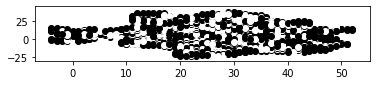

In [109]:
plt.figure(figsize=(6, 1))
for key, value in myRobot.map.items():
    if value == 1:
        plt.scatter(key[0], key[1], c='black')
    else:
        plt.scatter(key[0], key[1], c='white')

plt.show()